# Building Energy Efficiency Analysis

## Unifying column names

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataframe
df = pd.read_csv("nys_homes.csv")

In [3]:
#Function to rename columns
def rename_df(df, rename_dict):
    df.rename(columns = rename_dict, inplace=True)
    return df

In [4]:
#Function to transform each column into small capital letters
def column_into_small_letters(df):
    for column in df.columns:
        df.rename(columns = {column:column.replace(" ", "_").lower()}, inplace = True)
    return df

In [5]:
#Function to unify entries in column according to given translator dictionary
def unify_column_entries(df, translator, column):
    df.replace({column: translator}, inplace = True)
    return df

In [6]:
#Function to rename columns
new_clm_names = {"Reporting Period": "Reporting Period",
              "Home Performance Project ID": "Home Performance Project ID",
              "Home Performance Site ID": "Home Performance Site ID",
              "Project County": "Project County",
              "Project City": "Project City",
              "Project Zip": "Project Zip",
              "Gas Utility": "Gas Utility Provider",
              "Electric Utility": "Electric Utility Provider",
              "Project Completion Date": "Project Completion Date",
              "Customer Type": "Customer Type",
              "Low-Rise or Home Performance Indicator": "Job Type",
              "Total Project Cost": "Total Project Cost",
              "Total Incentives": "Total Incentives",
              "Type of Program Financing": "Type of Program Financing",
              "Amount Financed Through Program": "Amount Financed Through Program",
              "Pre-Retrofit Home Heating Fuel Type": "Pre-Retrofit Home Heating Fuel Type",
              "Year Home Built": "Year Home Built",
              "Size of Home": "Size of Home",
              "Volume of Home": "Volume of Home",
              "Number of Units": "Number of Units",
              "Measure Type": "Measure Type",
              "Estimated Annual kWh Savings": "Estimated Annual kWh Savings",
              "Estimated Annual MMBtu Savings": "Estimated Annual MMBtu Savings",
              "First Year Energy Savings $ Estimate": "First Year Energy Savings $ Estimate",
              "Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)": "Homeowner Received Free/Reduced Cost Audit?",
              "New Georeferenced Column": "Location",
              "New York Zip Codes 2": "New York Zip Codes",
              "Counties 2": "Counties 2",
              "NYS Municipal Boundaries 2": "NYS Municipal Boundaries 2"}

rename_df(df, new_clm_names)

,Reporting Period,Home Performance Project ID,Home Performance Site ID,Project County,Project City,Project Zip,Gas Utility Provider,Electric Utility Provider,Project Completion Date,Customer Type,...,Number of Units,Measure Type,Estimated Annual kWh Savings,Estimated Annual MMBtu Savings,First Year Energy Savings $ Estimate,Homeowner Received Free/Reduced Cost Audit?,Location,New York Zip Codes,Counties 2,NYS Municipal Boundaries 2
0,2020-02-12T00:00:00.000,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16T00:00:00.000,Assisted,...,1.0,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985
1,2020-02-12T00:00:00.000,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06T00:00:00.000,Assisted,...,1.0,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631
2,2020-02-12T00:00:00.000,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15T00:00:00.000,Assisted,...,1.0,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300
3,2020-02-12T00:00:00.000,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09T00:00:00.000,Assisted,...,1.0,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989
4,2020-02-12T00:00:00.000,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08T00:00:00.000,Assisted,...,1.0,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,2020-02-12T00:00:00.000,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15T00:00:00.000,Market,...,1.0,Building Shell,0,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298
55826,2020-02-12T00:00:00.000,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28T00:00:00.000,Assisted,...,1.0,Building Shell,0,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832
55827,2020-02-12T00:00:00.000,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13T00:00:00.000,Market,...,1.0,Building Shell,0,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712
55828,2020-02-12T00:00:00.000,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26T00:00:00.000,Market,...,1.0,Building Shell,601,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545


In [7]:
# convert column names to lower and replace spaces with underscore
column_into_small_letters(df)

,reporting_period,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,...,number_of_units,measure_type,estimated_annual_kwh_savings,estimated_annual_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2
0,2020-02-12T00:00:00.000,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16T00:00:00.000,Assisted,...,1.0,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985
1,2020-02-12T00:00:00.000,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06T00:00:00.000,Assisted,...,1.0,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631
2,2020-02-12T00:00:00.000,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15T00:00:00.000,Assisted,...,1.0,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300
3,2020-02-12T00:00:00.000,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09T00:00:00.000,Assisted,...,1.0,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989
4,2020-02-12T00:00:00.000,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08T00:00:00.000,Assisted,...,1.0,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,2020-02-12T00:00:00.000,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15T00:00:00.000,Market,...,1.0,Building Shell,0,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298
55826,2020-02-12T00:00:00.000,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28T00:00:00.000,Assisted,...,1.0,Building Shell,0,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832
55827,2020-02-12T00:00:00.000,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13T00:00:00.000,Market,...,1.0,Building Shell,0,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712
55828,2020-02-12T00:00:00.000,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26T00:00:00.000,Market,...,1.0,Building Shell,601,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545


In [8]:
# replace nan in Type of Program Financing with "None"
# code not working yet. replaces all nans in the df with None
#df.loc[df["Type of Program Financing"].isna()] = "None"

## Column 1: Reporting Period

In [9]:
# save reporting period to variable and then drop it, since there is only one
reporting_period = df["reporting_period"].unique()
df = df.drop("reporting_period", axis=1)

## Column 2: Home Performance Project ID

In [10]:
# how many Site IDs have more than 1 or 2 project IDs?
over_1_project_id = (df["home_performance_project_id"].value_counts() > 1).value_counts()
over_2_project_id = (df["home_performance_project_id"].value_counts() > 2).value_counts()
df["home_performance_project_id"].value_counts()

428275          2
P00000851554    2
346123          2
387339          2
315721          2
               ..
P00000883459    1
P00000971469    1
P00001002123    1
P00000970398    1
P00000725072    1
Name: home_performance_project_id, Length: 55809, dtype: int64

## Column 3: Site ID

## Column 4, 5, 6: County, City, Zipcode

In [11]:
# define variables for counties, cities and zipcodes
counties = df["project_county"].unique()
cities = df["project_city"].unique()
zipcodes = df["project_zip"].unique()

## Column 7.1 & 7.2: Electric Utility, Gas Utility Provider

In [75]:
df["gas_utility_provider"].isna().shape

(38956,)

In [13]:
df["gas_utility_provider"].unique()

array([nan, 'National Fuel Gas Distribution', 'Rochester Gas & Electric',
       'National Grid', 'New York State Electric & Gas',
       'Consolidated Edison', 'Orange & Rockland', 'Corning Natural Gas',
       'Central Hudson Gas & Electric', 'Saint Lawrence Gas', 'Municipal',
       'KeySpan Energy', 'Long Island Power Authority',
       'Multiple Gas Providers', 'No Gas Provider'], dtype=object)

In [12]:
# show electric utility operators
df["electric_utility_provider"].unique()

KeyError: 'electric_utility'

## Column 8: Project Completion Date

In [14]:
# convert project completion date to datetime format with pandas
df["project_completion_date"] = pd.to_datetime(df["project_completion_date"])

In [15]:
# get years from Project Completion Date
df["year"] = df["project_completion_date"].apply(lambda x: x.year)

In [16]:
# How many projects per year?
df["year"].value_counts()

2016    7016
2015    6568
2019    5804
2014    5799
2011    5470
2013    5360
2017    5187
2018    5116
2012    5106
2020    3084
2010     898
2021     422
Name: year, dtype: int64

## Column 9: Customer Type

In [17]:
df["customer_type"].value_counts()

Market      34085
Assisted    21745
Name: customer_type, dtype: int64

## Column 10: Low-rise or Home Performance Indicator

In [19]:
df.head()

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,measure_type,estimated_annual_kwh_savings,estimated_annual_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2020


In [20]:
df["job_type"].value_counts()

Home Performance    55830
Name: job_type, dtype: int64

## Column 11: Total Project Cost

In [21]:
df["total_project_cost"].describe()

count    55830.000000
mean      8572.804263
std       5582.971049
min          0.000000
25%       4700.000000
50%       7286.000000
75%      10757.000000
max      85290.000000
Name: total_project_cost, dtype: float64

In [22]:
# remove null value in total_project_cost (it's only one!)
df = df.loc[(df["total_project_cost"] != 0)]

<AxesSubplot:xlabel='total_project_cost', ylabel='Count'>

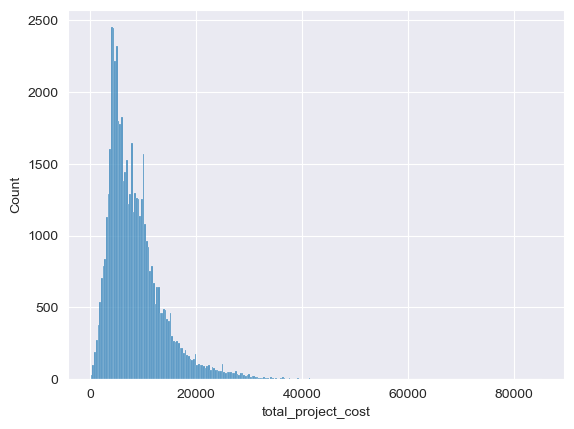

In [23]:
sns.histplot(df["total_project_cost"])

## Column 12: Total Incentives

In [24]:
df["total_incentives"].describe()

count    55829.000000
mean      1687.341418
std       1705.700525
min          0.000000
25%        301.000000
50%       1004.000000
75%       2899.000000
max      10000.000000
Name: total_incentives, dtype: float64

In [25]:
(df["total_incentives"]==0).value_counts()

False    44697
True     11132
Name: total_incentives, dtype: int64

<AxesSubplot:xlabel='total_incentives', ylabel='Count'>

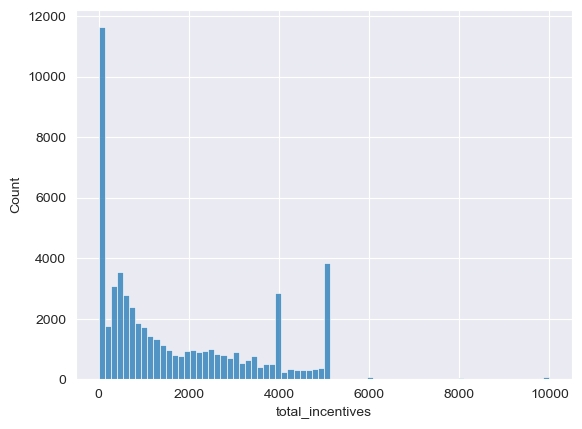

In [26]:
sns.histplot(df["total_incentives"])

## Column 13: Type of Program Financing

In [27]:
df["type_of_program_financing"].value_counts()

Green Jobs - Green NY Smart Energy Loan        14474
Green Jobs - Green NY On-Bill Recovery Loan     3689
ESMART                                           219
ESTAR                                             83
Name: type_of_program_financing, dtype: int64

In [28]:
df["type_of_program_financing"].isna().value_counts()

True     37364
False    18465
Name: type_of_program_financing, dtype: int64

## Column 14: Amount Financed Through Program

In [29]:
df["amount_financed_through_program"].describe()

count    55829.000000
mean      2805.029107
std       5084.069034
min          0.000000
25%          0.000000
50%          0.000000
75%       4307.000000
max      25000.000000
Name: amount_financed_through_program, dtype: float64

<AxesSubplot:xlabel='amount_financed_through_program', ylabel='Count'>

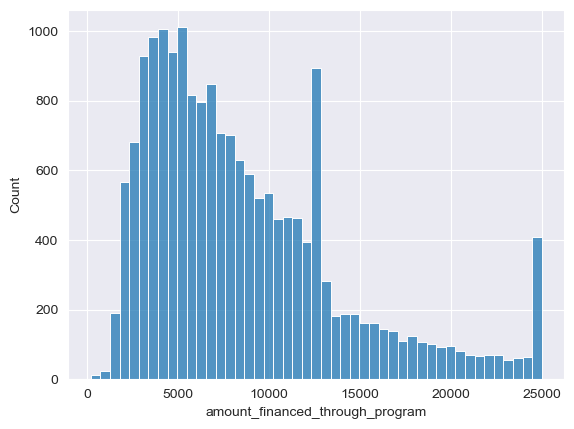

In [30]:
# histogram of all non-zero values in amount_financed_through_program
sns.histplot(df["amount_financed_through_program"].loc[df["amount_financed_through_program"] != 0])

In [31]:
# drop all rows where Year Built == nan (drops around 20.000 rows)
df = df.loc[df["year_home_built"].notna()]

## Column 15: Pre-Retrofit Home Heating Fuel Type

In [32]:
#Application of unity_column_entries function
translator = {"Natural Gas" : "Natural Gas",
             "Oil": "Oil",
             "Natural gas": "Natural Gas",
             "Propane": "Propane",
             "Electricity": "Electricity",
             "Wood": "Wood",
             "Kerosene": "Kerosene",
             "Coal": "Coal",
             "Bituminous Coal": "Bituminous Coal",
             "Anthracite Coal": "Anthracite Coal",
             "Electric": "Electricity"}

unify_column_entries(df, translator, "pre-retrofit_home_heating_fuel_type")

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,measure_type,estimated_annual_kwh_savings,estimated_annual_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,Building Shell,0,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298,2010
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,Building Shell,0,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832,2011
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,Building Shell,0,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712,2011
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,Building Shell,601,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545,2010


In [33]:
df["pre-retrofit_home_heating_fuel_type"].value_counts()

Natural Gas        28883
Oil                 6135
Propane             2278
Electricity          627
Wood                 370
Wood Pellets         133
Kerosene              96
Coal                  32
Bituminous Coal        5
Anthracite Coal        5
Name: pre-retrofit_home_heating_fuel_type, dtype: int64

## Column 16: Year Home Built

In [34]:
df[df["year_home_built"].isna()].shape

(0, 29)

<AxesSubplot:xlabel='year_home_built', ylabel='Count'>

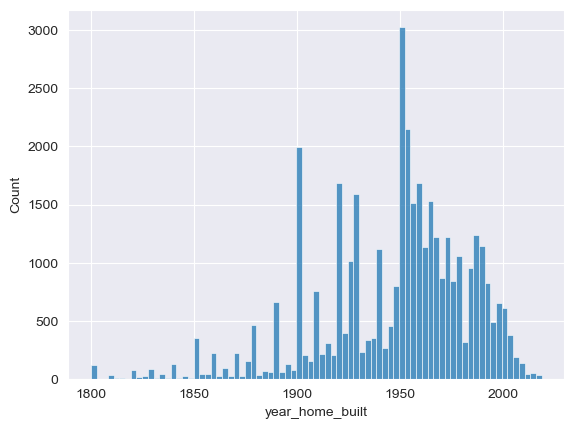

In [35]:
import seaborn as sns
sns.histplot(df["year_home_built"])

## Column 17: Size of Home

In [36]:
df[df["size_of_home"].isna()].shape

(0, 29)

In [37]:
df["size_of_home"].describe()

count    38956.000000
mean      1881.312814
std        679.293902
min        800.000000
25%       1364.000000
50%       1760.000000
75%       2272.000000
max       4000.000000
Name: size_of_home, dtype: float64

In [38]:
df["size_of_home"] = df["size_of_home"]*0.0929

In [39]:
df["size_of_home"].value_counts()

111.4800    385
167.2200    318
133.7760    307
148.6400    292
185.8000    280
           ... 
352.6484      1
89.2769       1
229.5559      1
227.6979      1
242.5619      1
Name: size_of_home, Length: 2876, dtype: int64

## Column 18: Volume of Home

In [40]:
df[df["volume_of_home"].isna()].shape

(0, 29)

In [41]:
df["volume_of_home"].describe()

count    38956.000000
mean     16211.362589
std       6532.801455
min       1111.000000
25%      11408.000000
50%      14928.000000
75%      19656.000000
max      70376.000000
Name: volume_of_home, dtype: float64

In [42]:
df["volume_of_home"] = df["volume_of_home"]*0.02832

In [43]:
df["volume_of_home"].value_counts()

271.87200     241
326.24640     185
407.80800     179
217.49760     164
304.49664     161
             ... 
1084.76928      1
725.04864       1
458.47248       1
749.17728       1
718.90320       1
Name: volume_of_home, Length: 10242, dtype: int64

## Column 19: Number of Units

In [44]:
df[df["number_of_units"].isna()].shape

(110, 29)

In [45]:
df[df["number_of_units"] == 0].shape

(0, 29)

In [46]:
df["number_of_units"].describe()

count    38846.000000
mean         1.035602
std          0.228476
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: number_of_units, dtype: float64

In [47]:
df["number_of_units"].value_counts()

1.0    37730
2.0      929
3.0      107
4.0       80
Name: number_of_units, dtype: int64

## Column 20: Measure Type

In [48]:
df[df["measure_type"].isna()].shape

(0, 29)

In [49]:
df["measure_type"].describe()

count              38956
unique                 3
top       Building Shell
freq               38577
Name: measure_type, dtype: object

In [50]:
df["measure_type"].value_counts()

Building Shell         38577
Heating and Cooling      375
Water Heater               4
Name: measure_type, dtype: int64

## Column 21: Estimated Annual kWh Savings

In [51]:
df[df["estimated_annual_kwh_savings"].isna()].shape

(0, 29)

In [52]:
df[df["estimated_annual_kwh_savings"] == 0].shape

(12521, 29)

In [53]:
df["estimated_annual_kwh_savings"].describe()

count    38956.000000
mean       428.505673
std       1811.826311
min     -24533.000000
25%          0.000000
50%         49.000000
75%        400.000000
max      63480.000000
Name: estimated_annual_kwh_savings, dtype: float64

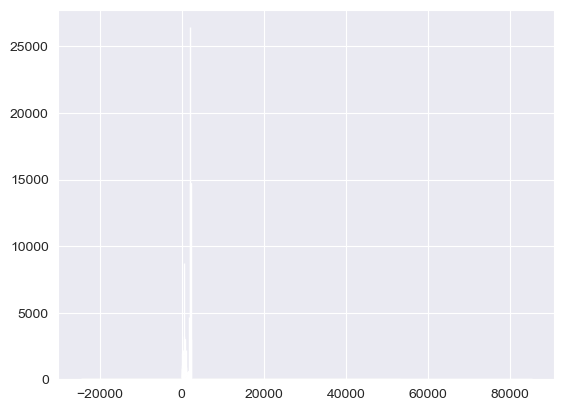

In [ ]:
plot_savings = df[df["estimated_annual_kwh_savings"] != 0]
sns.histplot(plot_savings)

## Column 22: Estimated Annual MMBtu Savings

In [55]:
df[df["estimated_annual_mmbtu_savings"].isna()].shape

(0, 29)

In [56]:
df[df["estimated_annual_mmbtu_savings"] == 0].shape

(2480, 29)

In [57]:
df["estimated_annual_mmbtu_savings"].describe()

count    38956.000000
mean        26.128145
std         25.774559
min       -214.000000
25%         10.000000
50%         19.000000
75%         35.000000
max        319.000000
Name: estimated_annual_mmbtu_savings, dtype: float64

<AxesSubplot:xlabel='estimated_annual_mmbtu_savings', ylabel='Count'>

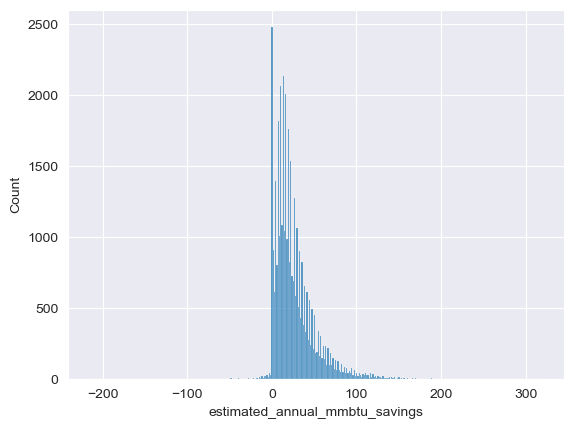

In [58]:
sns.histplot(df["estimated_annual_mmbtu_savings"])

## Column 23: First Year Energy Savings $ Estimate

In [59]:
df[df["first_year_energy_savings_$_estimate"].isna()].shape

(0, 29)

In [60]:
df[df["first_year_energy_savings_$_estimate"] == 0].shape

(14, 29)

In [61]:
df["first_year_energy_savings_$_estimate"].describe()

count    38956.000000
mean       498.816947
std        588.049248
min          0.000000
25%        136.000000
50%        289.000000
75%        630.000000
max       5981.000000
Name: first_year_energy_savings_$_estimate, dtype: float64

<AxesSubplot:xlabel='first_year_energy_savings_$_estimate', ylabel='Count'>

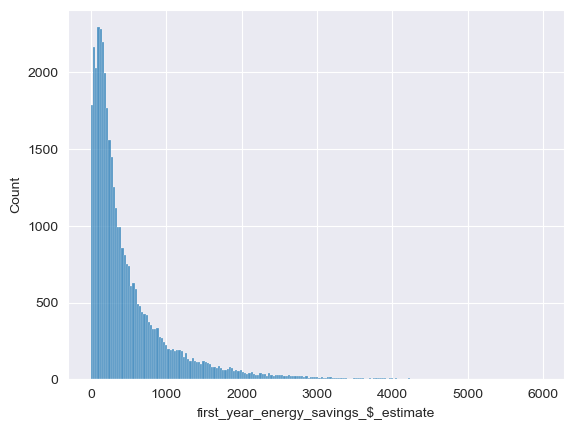

In [62]:
sns.histplot(df["first_year_energy_savings_$_estimate"])

In [63]:
df

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,measure_type,estimated_annual_kwh_savings,estimated_annual_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,Building Shell,0,27,474,Y,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,Building Shell,309,3,111,Y,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,Building Shell,0,8,61,Y,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,Building Shell,0,28,681,Y,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,Building Shell,0,6,146,Y,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,Building Shell,0,24,340,N,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298,2010
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,Building Shell,0,33,823,N,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832,2011
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,Building Shell,0,16,887,N,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712,2011
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,Building Shell,601,11,258,N,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545,2010


## Column 24: Homeowner Received Green Jobs-Green NY Free/Reduced Cost Audit (Y/N)

In [64]:
df[df["homeowner_received_free/reduced_cost_audit?"].isna()].shape

(0, 29)

In [65]:
df[df["homeowner_received_free/reduced_cost_audit?"] == 0].shape

(0, 29)

In [66]:
df["homeowner_received_free/reduced_cost_audit?"].value_counts()

Y    33231
N     5725
Name: homeowner_received_free/reduced_cost_audit?, dtype: int64

In [67]:
clm24_translator = {"Y": True, "N": False}

In [68]:
unify_column_entries(df, clm24_translator, "homeowner_received_free/reduced_cost_audit?")

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,measure_type,estimated_annual_kwh_savings,estimated_annual_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,location,new_york_zip_codes,counties_2,nys_municipal_boundaries_2,year
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,Building Shell,0,27,474,True,"{'type': 'Point', 'coordinates': [-75.16936, 4...",764.0,625.0,985,2021
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,Building Shell,309,3,111,True,"{'type': 'Point', 'coordinates': [-77.218837, ...",364.0,631.0,631,2021
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,Building Shell,0,8,61,True,"{'type': 'Point', 'coordinates': [-78.808435, ...",71.0,2041.0,300,2020
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,Building Shell,0,28,681,True,"{'type': 'Point', 'coordinates': [-75.454665, ...",1366.0,625.0,989,2020
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,Building Shell,0,6,146,True,"{'type': 'Point', 'coordinates': [-77.603561, ...",312.0,2091.0,742,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,Building Shell,0,24,340,False,"{'type': 'Point', 'coordinates': [-78.702553, ...",506.0,2041.0,298,2010
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,Building Shell,0,33,823,False,"{'type': 'Point', 'coordinates': [-73.932117, ...",72.0,2030.0,832,2011
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,Building Shell,0,16,887,False,"{'type': 'Point', 'coordinates': [-76.359264, ...",622.0,2181.0,712,2011
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,Building Shell,601,11,258,False,"{'type': 'Point', 'coordinates': [-77.597999, ...",1676.0,2093.0,545,2010


## Column 25: New Georeferenced Column

**google says "latitude and longitude" --> change order**

In [71]:
import ast

df["latitude"] = df["location"].apply(lambda x: ast.literal_eval(x)["coordinates"][0])
df["longitude"] = df["location"].apply(lambda x: ast.literal_eval(x)["coordinates"][1])
df.drop(["location"], axis=1, inplace=True)

## Columns 26 - 28: Remove columns

In [72]:
df.drop(["new_york_zip_codes", "counties_2", "nys_municipal_boundaries_2"], axis=1, inplace=True)

## Final dataframe

In [73]:
df

,home_performance_project_id,home_performance_site_id,project_county,project_city,project_zip,gas_utility_provider,electric_utility_provider,project_completion_date,customer_type,job_type,...,volume_of_home,number_of_units,measure_type,estimated_annual_kwh_savings,estimated_annual_mmbtu_savings,first_year_energy_savings_$_estimate,homeowner_received_free/reduced_cost_audit?,year,latitude,longitude
0,483911,357221,Oneida,Barneveld,13304,NaN,National Grid,2021-01-16,Assisted,Home Performance,...,543.29088,1.0,Building Shell,0,27,474,True,2021,-75.169360,43.241398
1,486389,343438,Wayne,Palmyra,14522,NaN,New York State Electric & Gas,2021-01-06,Assisted,Home Performance,...,241.20144,1.0,Building Shell,309,3,111,True,2021,-77.218837,43.059660
2,483374,356880,Erie,Buffalo,14215,National Fuel Gas Distribution,National Grid,2020-12-15,Assisted,Home Performance,...,581.01312,1.0,Building Shell,0,8,61,True,2020,-78.808435,42.934202
3,475733,350454,Oneida,Rome,13440,NaN,National Grid,2020-12-09,Assisted,Home Performance,...,222.02880,1.0,Building Shell,0,28,681,True,2020,-75.454665,43.214717
4,483731,356491,Livingston,Lima,14485,NaN,National Grid,2020-12-08,Assisted,Home Performance,...,212.96640,1.0,Building Shell,0,6,146,True,2020,-77.603561,42.886564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55825,P00000721450,S00000124921,Erie,Depew,14043,National Fuel Gas Distribution,New York State Electric & Gas,2010-11-15,Market,Home Performance,...,405.08928,1.0,Building Shell,0,24,340,False,2010,-78.702553,42.904567
55826,P00000727276,S00000130155,Schenectady,Schenectady,12303,National Grid,National Grid,2011-01-28,Assisted,Home Performance,...,671.29728,1.0,Building Shell,0,33,823,False,2011,-73.932117,42.759175
55827,P00000726343,S00000129326,Tompkins,Freeville,13068,New York State Electric & Gas,New York State Electric & Gas,2011-01-13,Market,Home Performance,...,244.68480,1.0,Building Shell,0,16,887,False,2011,-76.359264,42.505028
55828,P00000727199,S00000130090,Monroe,Rochester,14617,Rochester Gas & Electric,Rochester Gas & Electric,2010-12-26,Market,Home Performance,...,718.90320,1.0,Building Shell,601,11,258,False,2010,-77.597999,43.221623
